In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score,mean_absolute_error, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [2]:
df = pd.read_csv('ebola3.csv', index_col=0)

In [3]:
df.head(2)

,X,District,Poverty_Headcount,Poverty_Gap,Poverty_Severity,Gini_Coefficient,Proportion_Rural,Net_Primarily_Enrollment,Agriculture_Main_Livelihood,Poplation,Area,Population_Density,Borders_Water,Borders_Guinea,Borders_Liberia,Borders_Bo,Borders_Bombali,Borders_Bonthe,Borders_FreeTown,Borders_Kailahun,Borders_Kambia,Borders_Kenema,Borders_Koinadugu,Borders_Kono,Borders_Moyamba,Borders_PortLoko,Borders_Pujehun,Borders_Tonkolili,Borders_Western_Rural,Computer_Penetration,Internet_Penetration,English_Literacy,Native_Language_Literacy,Knows_Cause_of_Malaria,Recently_Ill,Recently_in_Hospital,Purchases_Medicine,Has_Disability,Physically_Weak,Percentage_Vaccinated,Christian,Muslim,Other.Religion,Age_of_Marriage,Attended_School,Employed,Paid_in_Barter,Commutes_to_Work,Migrated_to_Area,Primary_Completion,Junior_Secondary_Completion,Secondary_Completion,Tertiary_Completion,Number_of_Children,Birth_Weight,Contraception_Usage,AIDs_Awareness_Rate,AIDs_Protection_Rate,Condom_Awareness_Rate,Condom_Usage,Average_Commute_Measure,Father_Primary,Father_.Junior_Secondary,Father_Secondary,Father_Tertiary,Mother_Primary,Mother_Junior_Secondary,Mother_Secondary,Mother_Tertiary,Malaria_Prevalence,Cholera_Prevalence,Diarrhea_Prevalence,Dysentry_Prevalence,Guinea_Worm_Prevalence,Infection_Prevalence,River_Blindness_Prevalence,STI_Prevalence,TB_Prevalence,Typhoid_Prevalence,Other_Illness_Prevalence,Count_NGO,Count_NGO_Case_Managment,Count_NGO_Child_Protection,Count_NGO_Communication,Count_NGO_Coordination,Count_NGO_Cross_Border,Count_NGO_Family_Liason,Count_NGO_Food,Count_NGO_Logistics,Count_NGO_Other,Count_NGO_Psychosocial,Count_NGO_Burials,Count_NGO_Social_Mobilization,Count_NGO_Surveillance,Count_NGO_WASH,Epi.week,patient_database_confirmed,situation_report_confirmed,Year,Week,Day,Month,Datetime,PDC_lag1,PDC_lag2,PDC_lag3,PDC_lag4,PDC_lag5,SRC_lag1,SRC_lag2,SRC_lag3,SRC_lag4,SRC_lag5,District_Bo,District_Bombali,District_Bonthe,District_Free.Town,District_Kailahun,District_Kambia,District_Kenema,District_Koinadugu,District_Kono,District_Moyamba,District_Port.Loko,District_Pujehun,District_Tonkolili,District_Western.Rural,case_occured_PDC,case_occured_SRC,case_occured_PDC_lag1,case_occured_PDC_lag2,case_occured_PDC_lag3,case_occured_PDC_lag4,case_occured_PDC_lag5,case_occured_SRC_lag1,case_occured_SRC_lag2,case_occured_SRC_lag3,case_occured_SRC_lag4,case_occured_SRC_lag5,case_ind_Kailahun_PDC_lag1,case_ind_Kailahun_PDC_lag2,case_ind_Kailahun_PDC_lag3,case_ind_Kailahun_PDC_lag4,case_ind_Kailahun_PDC_lag5,case_num_Kailahun_PDC_lag1,case_num_Kailahun_PDC_lag2,case_num_Kailahun_PDC_lag3,case_num_Kailahun_PDC_lag4,case_num_Kailahun_PDC_lag5,case_ind_Kailahun_SRC_lag1,case_ind_Kailahun_SRC_lag2,case_ind_Kailahun_SRC_lag3,case_ind_Kailahun_SRC_lag4,case_ind_Kailahun_SRC_lag5,case_num_Kailahun_SRC_lag1,case_num_Kailahun_SRC_lag2,case_num_Kailahun_SRC_lag3,case_num_Kailahun_SRC_lag4,case_num_Kailahun_SRC_lag5,case_ind_Kono_PDC_lag1,case_ind_Kono_PDC_lag2,case_ind_Kono_PDC_lag3,case_ind_Kono_PDC_lag4,case_ind_Kono_PDC_lag5,case_num_Kono_PDC_lag1,case_num_Kono_PDC_lag2,case_num_Kono_PDC_lag3,case_num_Kono_PDC_lag4,case_num_Kono_PDC_lag5,case_ind_Kono_SRC_lag1,case_ind_Kono_SRC_lag2,case_ind_Kono_SRC_lag3,case_ind_Kono_SRC_lag4,case_ind_Kono_SRC_lag5,case_num_Kono_SRC_lag1,case_num_Kono_SRC_lag2,case_num_Kono_SRC_lag3,case_num_Kono_SRC_lag4,case_num_Kono_SRC_lag5,case_ind_Bombali_PDC_lag1,case_ind_Bombali_PDC_lag2,case_ind_Bombali_PDC_lag3,case_ind_Bombali_PDC_lag4,case_ind_Bombali_PDC_lag5,case_num_Bombali_PDC_lag1,case_num_Bombali_PDC_lag2,case_num_Bombali_PDC_lag3,case_num_Bombali_PDC_lag4,case_num_Bombali_PDC_lag5,case_ind_Bombali_SRC_lag1,case_ind_Bombali_SRC_lag2,case_ind_Bombali_SRC_lag3,case_ind_Bombali_SRC_lag4,case_ind_Bombali_SRC_lag5,case_num_Bombali_SRC_lag1,case_num_Bombali_SRC_lag2,case_num_Bombali_SRC_lag3,case_num_Bombali_SRC_lag4,case_num_Bombali_SRC_lag5,case_ind_Kambia_PDC_lag1,case_ind_Kambia_PDC_lag2,case_ind_Kambia_PDC_lag3,case_ind_Kambia_PD

In [ ]:
Kenema = df[df['District'] == 'Kenema']
Kenema[['any_cases']]

# Further data cleaning

In [4]:
# Filling all NaN values with 0
df.fillna(0, inplace = True)

In [5]:
# Turning the date to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [6]:
# Creating new value for any outbreak
df['any_cases'] = df.situation_report_confirmed.mask(df.situation_report_confirmed > 0, 1)

In [7]:
df.head(2)

,X,District,Poverty_Headcount,Poverty_Gap,Poverty_Severity,Gini_Coefficient,Proportion_Rural,Net_Primarily_Enrollment,Agriculture_Main_Livelihood,Poplation,Area,Population_Density,Borders_Water,Borders_Guinea,Borders_Liberia,Borders_Bo,Borders_Bombali,Borders_Bonthe,Borders_FreeTown,Borders_Kailahun,Borders_Kambia,Borders_Kenema,Borders_Koinadugu,Borders_Kono,Borders_Moyamba,Borders_PortLoko,Borders_Pujehun,Borders_Tonkolili,Borders_Western_Rural,Computer_Penetration,Internet_Penetration,English_Literacy,Native_Language_Literacy,Knows_Cause_of_Malaria,Recently_Ill,Recently_in_Hospital,Purchases_Medicine,Has_Disability,Physically_Weak,Percentage_Vaccinated,Christian,Muslim,Other.Religion,Age_of_Marriage,Attended_School,Employed,Paid_in_Barter,Commutes_to_Work,Migrated_to_Area,Primary_Completion,Junior_Secondary_Completion,Secondary_Completion,Tertiary_Completion,Number_of_Children,Birth_Weight,Contraception_Usage,AIDs_Awareness_Rate,AIDs_Protection_Rate,Condom_Awareness_Rate,Condom_Usage,Average_Commute_Measure,Father_Primary,Father_.Junior_Secondary,Father_Secondary,Father_Tertiary,Mother_Primary,Mother_Junior_Secondary,Mother_Secondary,Mother_Tertiary,Malaria_Prevalence,Cholera_Prevalence,Diarrhea_Prevalence,Dysentry_Prevalence,Guinea_Worm_Prevalence,Infection_Prevalence,River_Blindness_Prevalence,STI_Prevalence,TB_Prevalence,Typhoid_Prevalence,Other_Illness_Prevalence,Count_NGO,Count_NGO_Case_Managment,Count_NGO_Child_Protection,Count_NGO_Communication,Count_NGO_Coordination,Count_NGO_Cross_Border,Count_NGO_Family_Liason,Count_NGO_Food,Count_NGO_Logistics,Count_NGO_Other,Count_NGO_Psychosocial,Count_NGO_Burials,Count_NGO_Social_Mobilization,Count_NGO_Surveillance,Count_NGO_WASH,Epi.week,patient_database_confirmed,situation_report_confirmed,Year,Week,Day,Month,Datetime,PDC_lag1,PDC_lag2,PDC_lag3,PDC_lag4,PDC_lag5,SRC_lag1,SRC_lag2,SRC_lag3,SRC_lag4,SRC_lag5,District_Bo,District_Bombali,District_Bonthe,District_Free.Town,District_Kailahun,District_Kambia,District_Kenema,District_Koinadugu,District_Kono,District_Moyamba,District_Port.Loko,District_Pujehun,District_Tonkolili,District_Western.Rural,case_occured_PDC,case_occured_SRC,case_occured_PDC_lag1,case_occured_PDC_lag2,case_occured_PDC_lag3,case_occured_PDC_lag4,case_occured_PDC_lag5,case_occured_SRC_lag1,case_occured_SRC_lag2,case_occured_SRC_lag3,case_occured_SRC_lag4,case_occured_SRC_lag5,case_ind_Kailahun_PDC_lag1,case_ind_Kailahun_PDC_lag2,case_ind_Kailahun_PDC_lag3,case_ind_Kailahun_PDC_lag4,case_ind_Kailahun_PDC_lag5,case_num_Kailahun_PDC_lag1,case_num_Kailahun_PDC_lag2,case_num_Kailahun_PDC_lag3,case_num_Kailahun_PDC_lag4,case_num_Kailahun_PDC_lag5,case_ind_Kailahun_SRC_lag1,case_ind_Kailahun_SRC_lag2,case_ind_Kailahun_SRC_lag3,case_ind_Kailahun_SRC_lag4,case_ind_Kailahun_SRC_lag5,case_num_Kailahun_SRC_lag1,case_num_Kailahun_SRC_lag2,case_num_Kailahun_SRC_lag3,case_num_Kailahun_SRC_lag4,case_num_Kailahun_SRC_lag5,case_ind_Kono_PDC_lag1,case_ind_Kono_PDC_lag2,case_ind_Kono_PDC_lag3,case_ind_Kono_PDC_lag4,case_ind_Kono_PDC_lag5,case_num_Kono_PDC_lag1,case_num_Kono_PDC_lag2,case_num_Kono_PDC_lag3,case_num_Kono_PDC_lag4,case_num_Kono_PDC_lag5,case_ind_Kono_SRC_lag1,case_ind_Kono_SRC_lag2,case_ind_Kono_SRC_lag3,case_ind_Kono_SRC_lag4,case_ind_Kono_SRC_lag5,case_num_Kono_SRC_lag1,case_num_Kono_SRC_lag2,case_num_Kono_SRC_lag3,case_num_Kono_SRC_lag4,case_num_Kono_SRC_lag5,case_ind_Bombali_PDC_lag1,case_ind_Bombali_PDC_lag2,case_ind_Bombali_PDC_lag3,case_ind_Bombali_PDC_lag4,case_ind_Bombali_PDC_lag5,case_num_Bombali_PDC_lag1,case_num_Bombali_PDC_lag2,case_num_Bombali_PDC_lag3,case_num_Bombali_PDC_lag4,case_num_Bombali_PDC_lag5,case_ind_Bombali_SRC_lag1,case_ind_Bombali_SRC_lag2,case_ind_Bombali_SRC_lag3,case_ind_Bombali_SRC_lag4,case_ind_Bombali_SRC_lag5,case_num_Bombali_SRC_lag1,case_num_Bombali_SRC_lag2,case_num_Bombali_SRC_lag3,case_num_Bombali_SRC_lag4,case_num_Bombali_SRC_lag5,case_ind_Kambia_PDC_lag1,case_ind_Kambia_PDC_lag2,case_ind_Kambia_PDC_lag3,case_ind_Kambia_PD

# Ensemble models

In [8]:
# Preparing the dataset by removing irrelevant variables
df.drop(columns = ['X', 'patient_database_confirmed', 'situation_report_confirmed', 'Year', 'Week', 'Day'], inplace = True)


In [9]:
df.drop(columns = ['case_occured_PDC', 'case_occured_SRC'], inplace = True)


In [10]:
df.drop(columns = 'Epi.week', inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 1 to 1722
Columns: 647 entries, District to any_cases
dtypes: datetime64[ns](1), float64(598), int64(47), object(1)
memory usage: 8.5+ MB


### Split the weeks that we will use for showing results

In [12]:
df.Datetime.value_counts()

2014-09-29    14
2015-11-16    14
2015-12-10    14
2014-09-15    14
2015-12-21    14
2014-02-24    14
2014-08-12    14
2016-02-15    14
2014-04-21    14
2015-07-27    14
2014-06-16    14
2015-04-05    14
2015-09-21    14
2015-11-05    14
2014-01-09    14
2014-01-20    14
2015-06-04    14
2015-04-27    14
2015-09-11    14
2014-03-17    14
2015-06-22    14
2015-08-06    14
2015-08-17    14
2014-04-08    14
2015-01-26    14
2014-11-08    14
2014-07-07    14
2015-03-23    14
2016-04-25    14
2015-05-18    14
2013-12-30    14
2015-10-26    14
2015-01-06    14
2015-05-10    14
2015-05-01    14
2015-06-15    14
2015-02-11    14
2015-12-01    14
2014-11-24    14
2016-02-29    14
2014-09-06    14
2014-05-05    14
2014-12-05    14
2015-01-19    14
2014-01-12    14
2014-06-30    14
2015-03-16    14
2014-08-25    14
2015-11-30    14
2014-10-20    14
2016-01-25    14
2014-03-31    14
2014-12-15    14
2016-02-05    14
2016-03-21    14
2014-05-26    14
2016-01-02    14
2015-08-31    14
2016-04-01    

In [13]:
selected_weeks = ['2014-09-06', '2014-10-27','2014-12-29']

df_holdout = df[df.Datetime.isin(selected_weeks)]
df2 = df[~df.Datetime.isin(selected_weeks)]
   
print(df.shape)
print(df_holdout.shape)
print(df2.shape)


(1722, 647)
(41, 647)
(1681, 647)


In [14]:
X = df2.drop(columns = ['any_cases', 'Datetime', 'District'])
y = df2.any_cases

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 1 to 1722
Columns: 644 entries, Poverty_Headcount to WR_geogint_SRC_lag2
dtypes: float64(598), int64(46)
memory usage: 8.3 MB


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Random Forest

In [17]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

93.77

In [18]:
print('Random Forest Classifier f1-score (unoptimized):')
round(f1_score(y_test, random_forest.predict(X_test)) * 100, 2)

Random Forest Classifier f1-score (unoptimized):


83.46

### Optimizing the RFClassifier

In [19]:
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100, 1000),
    }, cv=5, scoring='f1', verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_
    
rfc = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)# Perform K-Fold CV
scores = cross_val_score(rfc, X, y, cv=10, scoring='f1')

round(np.mean(scores)*100, 2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


63.87

In [20]:
print('CV f1-score for optimized random forest:')
rfc.fit(X_train, y_train)
round(f1_score(y_test, rfc.predict(X_test))*100, 2)

CV f1-score for optimized random forest:


83.61

### XGBoost

In [21]:
xgb_model=xgb.XGBClassifier(random_state=42, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_score = round(xgb_model.score(X_test,y_test) * 100, 2)
xgb_score

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


94.07

In [22]:
print('XGBoost Classifier f1-score (unoptimized):')
round(f1_score(y_test, xgb_model.predict(X_test)) * 100, 2)

XGBoost Classifier f1-score (unoptimized):


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


83.87

In [23]:
xgb_model.predict(X_test).sum()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


61

In [24]:
# Need to optimize the XGBoost see if that makes a difference

### Reporting results

In [25]:
# Report confusion matrix and ROC AUC scores
conf_mat_rf = confusion_matrix(y_test, rfc.predict(X_test))
print('Confusion matrix for Random Forest:')
print(conf_mat_rf)


Confusion matrix for Random Forest:
[[266   8]
 [ 12  51]]


In [27]:
conf_mat_xgb = confusion_matrix(y_test, xgb_model.predict(X_test))
print('Confusion matrix for XGBoost:')
print(conf_mat_xgb)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix for XGBoost:
[[265   9]
 [ 11  52]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


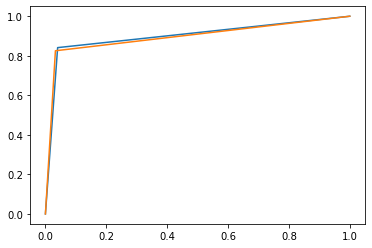

No handles with labels found to put in legend.


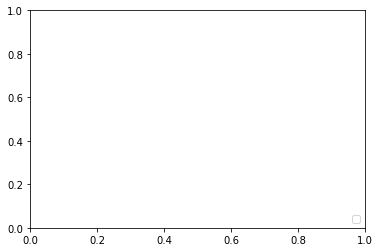

In [28]:
fpr,tpr,thresholds=roc_curve(y_test, random_forest.predict(X_test))
fpr2,tpr2,thresholds=roc_curve(y_test, xgb_model.predict(X_test))


plt.plot(fpr,tpr, fpr2, tpr2)
plt.show()
plt.legend(loc="lower right")

In [29]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
feature_importances

,importance
SRC_lag1,0.076585
SRC_lag4,0.069063
PDC_lag4,0.055930
case_occured_SRC_lag1,0.045564
PDC_lag7,0.042912
PDC_lag1,0.039815
PDC_lag2,0.031789
case_occured_PDC_lag3,0.030446
SRC_lag2,0.029141
case_num_Tonkolili_PDC_lag4,0.028547


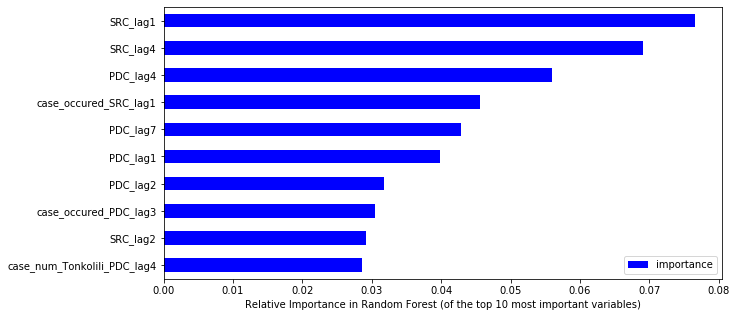

In [30]:
importances = feature_importances[:10].iloc[::-1]
importances.plot.barh(color='b', align='center', figsize=(10,5))
ax = plt.xlabel('Relative Importance in Random Forest (of the top 10 most important variables)')

# Report test values

In [31]:
X_holdout = df_holdout.drop(columns = ['any_cases', 'Datetime', 'District'])
y_holdout = df_holdout.any_cases

In [34]:
df_holdout['prediction'] = rfc.predict(X_holdout)
results = df_holdout[['District', 'Datetime', 'any_cases', 'prediction']]
results

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,District,Datetime,any_cases,prediction
Column1,,,,
323,Bo,2014-09-06,0,0
324,Bombali,2014-09-06,0,0
325,Bonthe,2014-09-06,0,0
326,Free Town,2014-09-06,0,0
327,Kailahun,2014-09-06,0,0
328,Kambia,2014-09-06,0,0
329,Kenema,2014-09-06,0,0
330,Koinadugu,2014-09-06,0,0
331,Kono,2014-09-06,0,0


In [33]:
results.to_csv('classifier_results.csv')